# Задание 1

Система состоит из устройств типа A и типа B, интенсивности отказов $\lambda_A$ и $\lambda_B$ известны. Для функционирования системы требуется хотя бы одно устройство типа A и хотя бы $N_B$ устройств типа B. Общее число устройств в системе (включая резервные) – $R_A$ и $R_A$ соответственно, причём в нормальном состоянии одновременно включены сразу $N_A$ устройств типа A.

Если N – номер зачётной книжки, а G – последняя цифра в номере группы, то параметры системы определяются следующим образом: 

N = 123, G = 1

$\lambda_A$ = G + (N mod 3) = 1 + 0 = 1

$\lambda_B$ = G + (N mod 5) = 1 + 3 = 4

$N_A$ = 2 + (G mod 2) = 2 + 0 = 2

$N_B$ = 2 + (N mod 2) = 2 + 1 = 3

$R_A$ = 4 + (G mod 2) = 4 + 0 = 4

$R_B$ = 5 – (G mod 2) = 5 

Требуется:
1. [x] нарисовать граф состояний системы;
2. [x] составить матрицу интенсивностей переходов;
3. [x] записать дифференциальные уравнения Колмогорова;
4. [x] аналитически решить полученную систему уравнений, исходя из того, что в начальный момент времени все устройства исправны;
5. [x] построить графики вероятностей нахождения системы в каждом из возможных состояний с течением времени;
6. [x] построить график функции надёжности системы;
7. [x] рассчитать математическое ожидание времени безотказной работы;
8. [x] провести имитационное моделирование системы в терминах непрерывных марковских цепей 100 раз, рассчитать среднее выборочное значение и стандартное отклонение времени безотказной работы системы.


In [1]:
# Подключение библиотек

import numpy as np
import seaborn as sb
import csv
import pandas as pd
import random
import matplotlib.pyplot as plt
from sympy import symbols, dsolve, Function, Eq, integrate, oo

# 1. Граф состояний системы

$S^{ij}_k$ - состояние в графе, 

$i$ - исправно работающие устройства типа A, 

$j$ - резервные устройства типа A, 

$k$ -  исправно работающие устройства типа B.

Строим граф состояний системы как для СМО.

![gr](src/smo.png)

# 2. Матрица состояний переходов

Второй этап — составление матрицы интенсивностей переходов ($Q$). Она представляет собой квадратную матрицу размерностью n x n, где n – число вершин в графе состояний марковской системы. Матрица составляется по следующему алгоритму. Выбирается одно состояние (номер этого состояния ($i$) будет соответствовать номеру строки в матрице). Затем следует определить сумму выходящих потоков, т.е. сумму весов всех выходящих из $i$-ой вершины дуг. Эта величина записывается в ячейку $Q(i,i)$. Затем следует проанализировать все дуги, входящие $i$-ую в вершину. Если дуга входит в $i$-ую в вершину из вершины $j$, то вес дуги записывается в ячейку матрица $Q(i,j)$.

Диагональные элементы матрицы состояний переходов определяются из условия:
$\sum^n_{j = 1}q_{ij} = 0$, откуда $q_{ii} = -\sum^n_{j = 1, i \neq j}q_{ij}$.

$\lambda_1 = 2\lambda_A + 5\lambda_B = 22$

$\lambda_2 = 2\lambda_A + 4\lambda_B = 18$

$\lambda_3 = 2\lambda_A + 3\lambda_B = 14$

$\lambda_4 = \lambda_A + 5\lambda_B = 21$

$\lambda_5 = \lambda_A + 4\lambda_B = 17$

$\lambda_6 = \lambda_A + 3\lambda_B = 13$

$\lambda_A = 1$

$\lambda_B = 4$


$ Q = \begin{bmatrix}
-\lambda_1&2\lambda_A&5\lambda_B&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0  \\
0&-\lambda_1&0&2\lambda_A&5\lambda_B&0&0&0&0&0&0&0&0&0&0&0&0&0&0 \\
0&0&-\lambda_2&0&2\lambda_A&4\lambda_B&0&0&0&0&0&0&0&0&0&0&0&0&0 \\
0&0&0&-\lambda_1&0&0&2\lambda_A&5\lambda_B&0&0&0&0&0&0&0&0&0&0&0 \\
0&0&0&0&-\lambda_2&0&0&2\lambda_A&4\lambda_B&0&0&0&0&0&0&0&0&0&0 \\
0&0&0&0&0&-\lambda_3&0&0&2\lambda_A&3\lambda_B&0&0&0&0&0&0&0&0&0 \\
0&0&0&0&0&0&-\lambda_4&0&0&0&\lambda_A&5\lambda_B&0&0&0&0&0&0&0 \\
0&0&0&0&0&0&0&-\lambda_2&0&0&0&2\lambda_A&4\lambda_B&0&0&0&0&0&0 \\
0&0&0&0&0&0&0&0&-\lambda_3&0&0&0&2\lambda_A&3\lambda_B&0&0&0&0&0 \\
0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0 \\
0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0 \\
0&0&0&0&0&0&0&0&0&0&0&-\lambda_5&0&0&\lambda_A&4\lambda_B&0&0&0 \\
0&0&0&0&0&0&0&0&0&0&0&0&-\lambda_3&0&0&2\lambda_A&3\lambda_B&0&0 \\
0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0 \\
0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0 \\
0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&-\lambda_6&0&\lambda_A&3\lambda_B \\
0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0 \\
0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0 \\
0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0 
\end{bmatrix} $

# 3. Дифференциальные уравнения Колмогорова

Система $P' = Q^TP$

Ссылка для понимания: https://www.hse.ru/mirror/pubs/share/182481937 , https://books.ifmo.ru/file/pdf/471.pdf

Система дифференциальных уравнений марковского случайного процесса, которая при заданных начальных условиях $P = \{p_1(0),..., p_n(0)\}$ позволяет выполнить исследование нестационарного (переходного) режима работы моделируемой системы путем расчета вероятностей состояний марковского процесса в произвольный момент времени $t > 0$:

$\frac{dp_j(t)}{dt} = \sum^n_{i = 1}p_i(t)q_{ij}, (j = 1, n)$

$\frac{dp_1}{dt} = -\lambda_1p_1$

$\frac{dp_2}{dt} = -\lambda_1p_2 + 2\lambda_Ap_1$

$\frac{dp_3}{dt} = -\lambda_2p_3 + 5\lambda_Bp_1$

$\frac{dp_4}{dt} = -\lambda_1p_4 + 2\lambda_Ap_2$

$\frac{dp_5}{dt} = -\lambda_2p_5 + 5\lambda_Bp_2 + 2\lambda_Ap_3$

$\frac{dp_6}{dt} = -\lambda_3p_6 + 4\lambda_Bp_3$

$\frac{dp_7}{dt} = -\lambda_4p_7 + 2\lambda_Ap_4$

$\frac{dp_8}{dt} = -\lambda_2p_8 + 5\lambda_Bp_4 + 2\lambda_Ap_5$

$\frac{dp_9}{dt} = -\lambda_3p_9 + 4\lambda_Bp_5 + 2\lambda_Ap_6$

$\frac{dp_{10}}{dt} = 3\lambda_Bp_6$

$\frac{dp_{11}}{dt} = \lambda_Ap_7$

$\frac{dp_{12}}{dt} = -\lambda_5p_{12} + 5\lambda_Bp_7 + 2\lambda_Ap_8$

$\frac{dp_{13}}{dt} = -\lambda_3p_{13} + 4\lambda_Bp_8 + 2\lambda_Ap_9$

$\frac{dp_{14}}{dt} = 3\lambda_Bp_{9}$

$\frac{dp_{15}}{dt} = \lambda_Ap_{12}$

$\frac{dp_{16}}{dt} = -\lambda_6p_{16} + 4\lambda_Bp_{12} + 2\lambda_Ap_{13}$

$\frac{dp_{17}}{dt} = 3\lambda_Bp_{13}$

$\frac{dp_{18}}{dt} = \lambda_Ap_{16}$

$\frac{dp_{19}}{dt} = 3\lambda_Bp_{16}$


# 4. Аналитическое решение системы дифференциальных уравнений

Аналитически решить полученную систему уравнений, исходя из того, что в начальный момент времени все устройства исправны, то есть $p_1 = 1$, а все остальные вероятности равны нулю.

![gr1](src/IMG_4675.jpg)

![gr2](src/IMG_4676.jpg)

In [2]:
l1 = 22
l2 = 18
l3 = 14
l4 = 21
l5 = 17
l6 = 13

la = 1
lb = 4


# Аналитическое решение системы ДУ с помощью SymPy
t = symbols('t')
p0, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13, p14, p15, p16, p17, p18 = symbols('p0 p1 p2 p3 p4 p5 p6 p7 p8 p9 p10 p11 p12 p13 p14 p15 p16 p17 p18', cls=Function)
eqs = [Eq(p0(t).diff(t) + l1*p0(t), 0),
       Eq(p1(t).diff(t) + l1*p1(t), 2*la*p0(t)),
       Eq(p2(t).diff(t) + l2*p2(t), 5*lb*p0(t)),
       Eq(p3(t).diff(t) + l1*p3(t), 2*la*p1(t)),
       Eq(p4(t).diff(t) + l2*p4(t), 5*lb*p1(t) + 2*la*p2(t)),
       Eq(p5(t).diff(t) + l3*p5(t), 4*lb*p2(t)),
       Eq(p6(t).diff(t) + l4*p6(t), 2*la*p3(t)),
       Eq(p7(t).diff(t) + l2*p7(t), 5*lb*p3(t) + 2*la*p4(t)),
       Eq(p8(t).diff(t) + l3*p8(t), 4*lb*p4(t) + 2*la*p5(t)),
       Eq(p9(t).diff(t), 3*lb*p5(t)),
       Eq(p10(t).diff(t), la*p6(t)),
       Eq(p11(t).diff(t) + l5*p11(t), 5*lb*p6(t) + 2*la*p7(t)),
       Eq(p12(t).diff(t) + l3*p12(t), 4*lb*p7(t) + 2*la*p8(t)),
       Eq(p13(t).diff(t), 3*lb*p8(t)),
       Eq(p14(t).diff(t), la*p11(t)),
       Eq(p15(t).diff(t) + l6*p15(t), 4*lb*p11(t) + 2*la*p12(t)),
       Eq(p16(t).diff(t), 3*lb*p12(t)),
       Eq(p17(t).diff(t), la*p15(t)),
       Eq(p18(t).diff(t), 3*lb*p15(t))]

# Начальное распределение вероятностей
ics = {p0(0): 1, p1(0): 0, p2(0): 0, p3(0): 0, p4(0): 0, p5(0): 0, p6(0): 0, p7(0): 0, p8(0): 0, p9(0): 0, p10(0): 0, p11(0): 0, p12(0): 0, p13(0): 0, p14(0): 0, p15(0): 0, p16(0): 0, p17(0): 0, p18(0): 0}


solutions = dsolve(eqs, [p0(t), p1(t), p2(t), p3(t), p4(t), p5(t), p6(t), p7(t), p8(t), p9(t), p10(t), p11(t), p12(t), p13(t), p14(t), p15(t), p16(t), p17(t), p18(t)], ics=ics)

# 5. Графики вероятностей нахождения системы в каждом из возможных состояний с течением времени

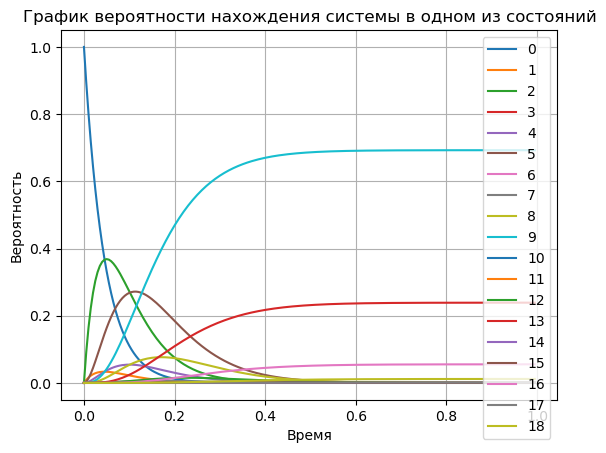

In [3]:
#sb.set_style("darkgrid")

plt.xlabel("Время")
plt.ylabel("Вероятность")
plt.title("График вероятности нахождения системы в одном из состояний")
# plt.rcParams["figure.figsize"] = [20, 10]
#plt.rcParams["figure.autolayout"] = True



# График вероятностей нахождения системы в каждом из возможных состояний с течением времени
x_values = np.arange(0, 1, 0.5e-2)
y_values = np.zeros(len(x_values))



for i in range(19):
    for j in range(len(x_values)):
        y_values[j] = solutions[i].subs(t, x_values[j]).rhs
    plt.plot(x_values, y_values)
plt.legend(range(19))
plt.grid(True)
plt.show()

# 6. График функции надёжности системы

Функция надежности системы определяется как:

$R(t) = \sum p_i$, где $p_i$ - вероятности, при которых система находится в рабочем состоянии. 

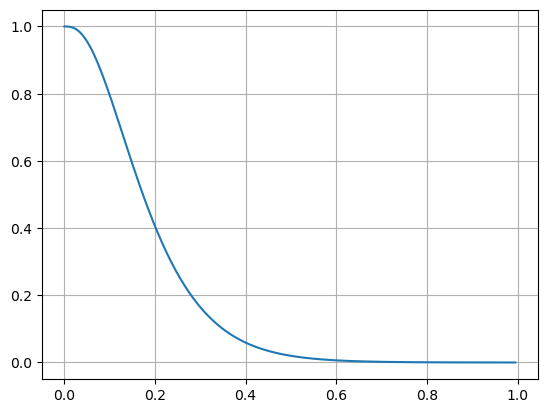

In [14]:
# График функции надёжности системы
x_values = np.arange(0, 1, 0.5e-2)
y_values = np.zeros(len(x_values))
for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 15]:
    for j in range(len(x_values)):
        y_values[j] += solutions[i].subs(t, x_values[j]).rhs
plt.plot(x_values, y_values)
plt.grid(True)
plt.show()

# 7. Математическое ожидание времени безотказной работы

Ссылка из википедии: https://ru.wikipedia.org/wiki/Вероятность_безотказной_работы

Среднее время безотказной работы (средняя наработка на отказ) $T_0$ — для невосстанавливаемых (неремонтируемых) систем — это математическое ожидание времени работы системы до отказа.

Графически полученное выражение для $T_0$ представлено на рисунке как площадь под графиком вероятности безотказной работы $R(T)$ от времени $T$. В начальный момент вероятность $R(T)$ равна единице. В конце времени работы системы вероятность $R(T)$ равна нулю.

In [5]:
Rt = sum(solutions[i].rhs for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 15])
mo = integrate(Rt, (t, 0, oo)).evalf()
# мат. ожидание
mo

0.195711359865727

# 8. Имитационное моделирование системы в терминах непрерывных марковских цепей 100 раз

Функция экспоненциального распределения

![gr](src/puas.png)

Пусть время обслуживания имеет показательное распределение.

https://scask.ru/a_book_tp.php?id=117

In [23]:
# Имитационное моделирование системы в терминах непрерывных марковских цепей
random.seed(0)
times = []
for i in range(100):
    work_A = 4
    work_B = 5
    time_destroy_A = 0.0
    time_destroy_B = 0.0
    # Время, при котором система попадет в терминальное состояние
    cur_time = 0.0
    while work_A > 0 and work_B > 2:
        if time_destroy_A == cur_time:
            time_destroy_A += random.expovariate(2 if work_A > 1 else 1)
        if time_destroy_B == cur_time:
            time_destroy_B += random.expovariate(work_B * 4)
        if time_destroy_A < time_destroy_B:
            cur_time = time_destroy_A
            work_A -= 1
        else:
            cur_time = time_destroy_B
            work_B -= 1
    times.append(cur_time)
    
# times - список моментов во времени, при которых каждый раз система попадала в терминальное состояние

## Cреднее выборочное значение системы

In [20]:
mean_time = np.mean(times)
mean_time

0.21325658444505538

## Стандартное отклонение времени безотказной работы системы

Среднеквадратическое отклонение:

$ S = \sqrt{\frac{\sum_{i=0}^{i = n}(x_i - x_m)^2}{n - 1}} $,

где $x_m$ - среднее выборочное значение системы $n$ измерений,
$x_i$ - значение результата в $i$-ом измерении.
$n$ - количество испытаний

In [21]:
std_dev = np.sqrt(sum((times[i] - mean_time)**2 for i in range(100)) / (100 - 1))
std_dev

0.13802761716309028